In [38]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [63]:
#Prediction Model 1 - Linear Regression off of house size
df = pd.read_csv('realtor_random_data_cleaned.csv')

In [64]:
df.head(50)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold
0,for_sale,69900,4,2,0.13,821384.0,Buffalo,New York,14213,1780,1993-12-29
1,for_sale,1550000,3,3,0.15,945950.0,Whitefish,Montana,59937,2562,NaN
2,for_sale,259900,5,4,2.17,408723.0,Wausau,Wisconsin,54401,2364,NaN
3,for_sale,459800,4,3,0.36,253033.0,Lindstrom,Minnesota,55045,2489,2015-03-27
4,for_sale,256225,4,3,0.17,1291946.0,Hammond,Louisiana,70401,1847,NaN
5,for_sale,1849000,5,7,0.28,74891.0,Naperville,Illinois,60563,7582,2015-07-09
6,for_sale,379445,4,3,0.24,1345111.0,Sylvania,Ohio,43560,2119,NaN
7,for_sale,1150000,4,3,2.01,1416775.0,Kenneth City,Florida,33709,2656,2013-01-23
8,for_sale,389000,4,3,0.16,689714.0,Bradenton,Florida,34212,2222,2005-08-03
9,for_sale,1280000,75,30,0.39,1165833.0,Endicott,New York,13760,22752,2004-12-08


In [69]:
iowa_df = df[df['state'].str.contains('iowa', case=False, na=False)]
iowa_df

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold
10,for_sale,379900,4,4,0.19,206657.0,Indianola,Iowa,50125,1900,2020-07-22
62,for_sale,424419,4,3,0.23,1583517.0,Grimes,Iowa,50111,2140,NaN
148,for_sale,89900,3,2,0.99,832768.0,Lansing,Iowa,52151,1088,NaN
152,for_sale,438500,5,4,0.30,372331.0,Sioux Center,Iowa,51250,3579,NaN
171,for_sale,135000,4,3,0.27,957578.0,Shellsburg,Iowa,52332,2304,1993-11-01
...,...,...,...,...,...,...,...,...,...,...,...
52476,for_sale,395000,5,3,0.22,528707.0,Boone,Iowa,50036,1788,NaN
52508,for_sale,179900,3,1,0.19,1465497.0,Dysart,Iowa,52224,1504,2022-04-15
52555,for_sale,599900,5,3,0.29,1599380.0,North Liberty,Iowa,52317,2886,NaN
52583,for_sale,342000,3,3,0.15,904554.0,Norwalk,Iowa,50211,1565,NaN


In [72]:
NEB_df = df[df['city'].str.contains('omaha', case=False, na=False)]
NEB_df

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold
532,for_sale,309500,3,4,0.11,538232.0,Omaha,Nebraska,68130,2518,2021-05-28
593,for_sale,159900,3,1,0.11,1483827.0,Omaha,Nebraska,68117,840,2019-07-22
1419,for_sale,129500,4,2,0.16,815288.0,Omaha,Nebraska,68111,1738,1999-07-09
1463,for_sale,170000,3,2,0.10,1320292.0,Omaha,Nebraska,68107,1374,2021-12-15
2431,for_sale,160000,2,2,0.14,1064714.0,Omaha,Nebraska,68105,1268,2005-09-15
...,...,...,...,...,...,...,...,...,...,...,...
50676,for_sale,219900,5,3,0.16,1346217.0,Omaha,Nebraska,68105,1656,2018-03-28
51021,for_sale,220000,3,2,0.16,225911.0,Omaha,Nebraska,68137,1384,1993-04-09
51676,for_sale,600000,4,4,0.24,180959.0,Omaha,Nebraska,68154,4576,2018-12-03
51867,for_sale,140000,2,1,0.15,751126.0,Omaha,Nebraska,68104,813,2010-12-27


In [41]:
home_df=df[['status', 'price', 'bed', 'bath', 'acre_lot', 'house_size']]
home_df

,status,price,bed,bath,acre_lot,house_size
0,for_sale,69900,4,2,0.13,1780
1,for_sale,1550000,3,3,0.15,2562
2,for_sale,259900,5,4,2.17,2364
3,for_sale,459800,4,3,0.36,2489
4,for_sale,256225,4,3,0.17,1847
...,...,...,...,...,...,...
52644,for_sale,290000,3,2,0.25,1786
52645,for_sale,220000,4,4,0.30,1638
52646,for_sale,124500,2,2,0.14,1523
52647,for_sale,175000,10,6,0.17,4472


In [42]:
home_df=home_df.dropna()
home_df

,status,price,bed,bath,acre_lot,house_size
0,for_sale,69900,4,2,0.13,1780
1,for_sale,1550000,3,3,0.15,2562
2,for_sale,259900,5,4,2.17,2364
3,for_sale,459800,4,3,0.36,2489
4,for_sale,256225,4,3,0.17,1847
...,...,...,...,...,...,...
52644,for_sale,290000,3,2,0.25,1786
52645,for_sale,220000,4,4,0.30,1638
52646,for_sale,124500,2,2,0.14,1523
52647,for_sale,175000,10,6,0.17,4472


In [43]:
home_df = home_df[home_df['house_size'] <= 20000]
home_df = home_df[home_df['price'] <= 5000000]
home_df

,status,price,bed,bath,acre_lot,house_size
0,for_sale,69900,4,2,0.13,1780
1,for_sale,1550000,3,3,0.15,2562
2,for_sale,259900,5,4,2.17,2364
3,for_sale,459800,4,3,0.36,2489
4,for_sale,256225,4,3,0.17,1847
...,...,...,...,...,...,...
52644,for_sale,290000,3,2,0.25,1786
52645,for_sale,220000,4,4,0.30,1638
52646,for_sale,124500,2,2,0.14,1523
52647,for_sale,175000,10,6,0.17,4472


In [44]:
# Create a scatter plot of price versus the house size information
sales_plot = home_df.hvplot.scatter(
    x="house_size",
    y="price",
    title="Sales price per House Size"
)
sales_plot

:Scatter   [house_size]   (price)

In [45]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = home_df["house_size"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[1780],
       [2562],
       [2364],
       [2489],
       [1847]])

In [46]:
# Create an array for the dependent variable y with the sales data
y = home_df["price"]

In [47]:
# Create a model with scikit-learn
model = LinearRegression()

In [48]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [49]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [238.06839948]


In [50]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: -53767.19024669356


In [51]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = -53767.19024669356 + 238.06839948400506X


In [52]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [53]:
# Create a copy of the original data
home_df_predicted = home_df.copy()

# Add a column with the predicted sales values
home_df_predicted["Predicted_sales_price"] = predicted_y_values

# Display sample data
home_df_predicted.head(40)

,status,price,bed,bath,acre_lot,house_size,Predicted_sales_price
0,for_sale,69900,4,2,0.13,1780,3.699946e+05
1,for_sale,1550000,3,3,0.15,2562,5.561640e+05
2,for_sale,259900,5,4,2.17,2364,5.090265e+05
3,for_sale,459800,4,3,0.36,2489,5.387851e+05
4,for_sale,256225,4,3,0.17,1847,3.859451e+05
5,for_sale,1849000,5,7,0.28,7582,1.751267e+06
6,for_sale,379445,4,3,0.24,2119,4.506997e+05
7,for_sale,1150000,4,3,2.01,2656,5.785425e+05
8,for_sale,389000,4,3,0.16,2222,4.752208e+05
10,for_sale,379900,4,4,0.19,1900,3.985628e+05


In [54]:
# Create a line plot of house size versus the predicted sales price
best_fit_line = home_df_predicted.hvplot.line(
    x = "house_size",
    y = "Predicted_sales_price",
    color = "red"
)
best_fit_line

:Curve   [house_size]   (Predicted_sales_price)

In [55]:
# Superpose the original data and the best fit line
sales_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [house_size]   (price)
   .Curve.I   :Curve   [house_size]   (Predicted_sales_price)

In [56]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.34702188538609635.
The r2 is 0.34702188538609635.
The mean squared error is 162175335662.563.
The root mean squared error is 402709.9895241773.
The standard deviation is 498359.89992432337.


In [58]:
#Prediction Model 2 - Random Forest using Bed, Bath, Acre size and House Size
df2 = pd.read_csv('realtor_random_data_cleaned.csv')

In [59]:
value_counts = df2['zip_code'].value_counts()
most_common_value = value_counts.idxmax()
most_common_count = value_counts.max()

print(f"Most common value: {most_common_value} (Count: {most_common_count})")

Most common value: 33993 (Count: 59)


In [23]:
df2 = df2[df2['zip_code'] == 33993]

df2.head(100)
df2.to_csv('FL_output.csv', index=False)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold


In [141]:
#Define features and target
X = df2[['bed', 'house_size']]
y = df2['price']

In [142]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [143]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
#Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [145]:
#Predict on the test set
y_pred = model.predict(X_test)

In [146]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: -0.3879


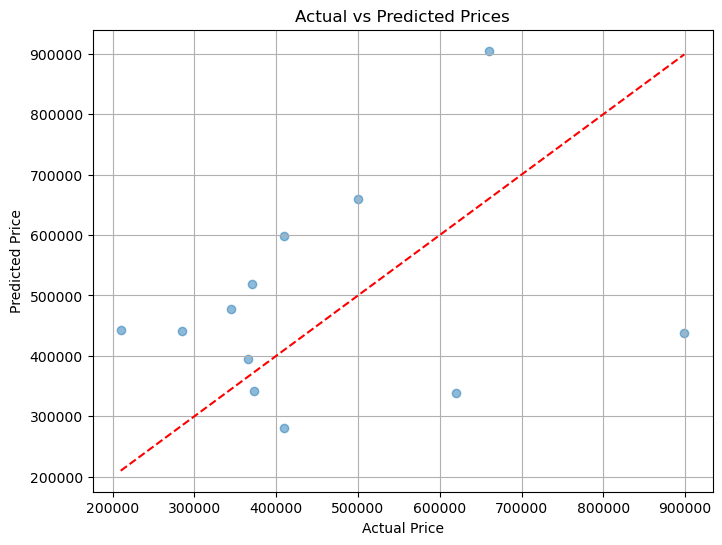

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [148]:
#Prediction Model 3 - Deep Learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [54]:
# Import our input dataset
df3 = pd.read_csv('realtor_random_data_cleaned.csv')
df3.head(50)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold
0,for_sale,69900,4,2,0.13,821384.0,Buffalo,New York,14213,1780,1993-12-29
1,for_sale,1550000,3,3,0.15,945950.0,Whitefish,Montana,59937,2562,NaN
2,for_sale,259900,5,4,2.17,408723.0,Wausau,Wisconsin,54401,2364,NaN
3,for_sale,459800,4,3,0.36,253033.0,Lindstrom,Minnesota,55045,2489,2015-03-27
4,for_sale,256225,4,3,0.17,1291946.0,Hammond,Louisiana,70401,1847,NaN
5,for_sale,1849000,5,7,0.28,74891.0,Naperville,Illinois,60563,7582,2015-07-09
6,for_sale,379445,4,3,0.24,1345111.0,Sylvania,Ohio,43560,2119,NaN
7,for_sale,1150000,4,3,2.01,1416775.0,Kenneth City,Florida,33709,2656,2013-01-23
8,for_sale,389000,4,3,0.16,689714.0,Bradenton,Florida,34212,2222,2005-08-03
9,for_sale,1280000,75,30,0.39,1165833.0,Endicott,New York,13760,22752,2004-12-08


In [55]:
# Select only numeric columns needed
df = df[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

# Drop any rows with missing values in selected columns
df = df.dropna()

In [56]:
# Define features and target
X = df[['bed', 'bath', 'acre_lot', 'house_size']]
y = df['price']

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Normalize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Select only numeric columns needed
df = df[['bed', 'bath', 'acre_lot', 'house_size', 'price']]

# Drop any rows with missing values in selected columns
df = df.dropna()

In [60]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=64, activation="relu", input_dim=4))

nn_model.add(tf.keras.layers.Dense(units=32, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the Sequential model
nn_model.summary()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="mse", optimizer="adam", metrics=["mae"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - loss: 1273555582976.0000 - mae: 508429.4062
Epoch 2/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 1419814371328.0000 - mae: 501263.5938
Epoch 3/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - loss: 1127651999744.0000 - mae: 436685.4688
Epoch 4/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - loss: 1460403961856.0000 - mae: 381744.9062
Epoch 5/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 1084956213248.0000 - mae: 314137.3438
Epoch 6/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - loss: 856324243456.0000 - mae: 269063.6562
Epoch 7/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - loss: 1015475994624.0000 - mae: 260716.1406
Epoch 8/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - loss: 1010197594112.0000 - mae: 265647.8750
Epoch 9/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - loss: 770747596800.0000 - mae: 271742.3750
Epoch 10/50
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - loss: 895578472448.0000 -

In [33]:
# Import our input dataset
df = pd.read_csv('realtor_random_data_cleaned.csv')
df.head(10)

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold
0,for_sale,69900,4,2,0.13,821384.0,Buffalo,New York,14213,1780,1993-12-29
1,for_sale,1550000,3,3,0.15,945950.0,Whitefish,Montana,59937,2562,NaN
2,for_sale,259900,5,4,2.17,408723.0,Wausau,Wisconsin,54401,2364,NaN
3,for_sale,459800,4,3,0.36,253033.0,Lindstrom,Minnesota,55045,2489,2015-03-27
4,for_sale,256225,4,3,0.17,1291946.0,Hammond,Louisiana,70401,1847,NaN
5,for_sale,1849000,5,7,0.28,74891.0,Naperville,Illinois,60563,7582,2015-07-09
6,for_sale,379445,4,3,0.24,1345111.0,Sylvania,Ohio,43560,2119,NaN
7,for_sale,1150000,4,3,2.01,1416775.0,Kenneth City,Florida,33709,2656,2013-01-23
8,for_sale,389000,4,3,0.16,689714.0,Bradenton,Florida,34212,2222,2005-08-03
9,for_sale,1280000,75,30,0.39,1165833.0,Endicott,New York,13760,22752,2004-12-08


In [34]:

ohio_df = df[df['zip_code'] == 44108]
#ohio_df = df[df['state'].str.contains('ohio', na=False)]
ohio_df

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold
12,for_sale,19000,6,2,0.10,51401.0,Cleveland,Ohio,44108,3112,2020-03-20
1407,for_sale,75900,5,1,0.10,94613.0,Cleveland,Ohio,44108,2026,1979-12-17
9027,for_sale,50000,6,2,0.10,51326.0,Cleveland,Ohio,44108,3688,2020-04-20
27401,for_sale,74900,6,3,0.11,71212.0,Cleveland,Ohio,44108,3684,2020-04-07
27752,for_sale,49900,4,2,0.10,61482.0,Cleveland,Ohio,44108,3070,2020-08-07
31003,for_sale,348700,2,2,8.97,6777.0,Bratenahl,Ohio,44108,1597,2020-02-03
33144,for_sale,197900,4,2,0.11,1818000.0,Cleveland,Ohio,44108,2568,1986-05-19
42224,for_sale,99921,4,1,0.08,1754138.0,Cleveland,Ohio,44108,2255,1996-10-31
42890,for_sale,50000,3,2,0.10,1514893.0,Cleveland,Ohio,44108,1440,2017-03-03
51753,for_sale,154200,4,2,0.08,1280202.0,Cleveland,Ohio,44108,2569,2018-11-30


In [35]:
ohio_df=ohio_df[['status', 'price', 'bed', 'bath', 'acre_lot', 'house_size', 'zip_code']]
ohio_df

,status,price,bed,bath,acre_lot,house_size,zip_code
12,for_sale,19000,6,2,0.10,3112,44108
1407,for_sale,75900,5,1,0.10,2026,44108
9027,for_sale,50000,6,2,0.10,3688,44108
27401,for_sale,74900,6,3,0.11,3684,44108
27752,for_sale,49900,4,2,0.10,3070,44108
31003,for_sale,348700,2,2,8.97,1597,44108
33144,for_sale,197900,4,2,0.11,2568,44108
42224,for_sale,99921,4,1,0.08,2255,44108
42890,for_sale,50000,3,2,0.10,1440,44108
51753,for_sale,154200,4,2,0.08,2569,44108


In [106]:
# Create a scatter plot of price versus the house size information
sales_plot = ohio_df.hvplot.scatter(
    x="house_size",
    y="price",
    title="Sales price per House Size"
)
sales_plot

:Scatter   [house_size]   (price)

In [107]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = ohio_df["house_size"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[3112],
       [2026],
       [3688],
       [3684],
       [3070]])

In [108]:
# Create an array for the dependent variable y with the sales data
y = ohio_df["price"]

In [109]:
# Create a model with scikit-learn
model = LinearRegression()

In [110]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [111]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [-45.11297753]


In [112]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 221613.16624201305


In [113]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 221613.16624201305 + -45.112977528468114X


In [114]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [115]:
# Create a copy of the original data
ohio_df_predicted = ohio_df.copy()

# Add a column with the predicted sales values
ohio_df_predicted["Predicted_sales_price"] = predicted_y_values

# Display sample data
ohio_df_predicted.head()

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,date_sold,Predicted_sales_price
12,for_sale,19000,6,2,0.10,51401.0,Cleveland,Ohio,44108,3112,2020-03-20,81221.580173
1407,for_sale,75900,5,1,0.10,94613.0,Cleveland,Ohio,44108,2026,1979-12-17,130214.273769
9027,for_sale,50000,6,2,0.10,51326.0,Cleveland,Ohio,44108,3688,2020-04-20,55236.505117
27401,for_sale,74900,6,3,0.11,71212.0,Cleveland,Ohio,44108,3684,2020-04-07,55416.957027
27752,for_sale,49900,4,2,0.10,61482.0,Cleveland,Ohio,44108,3070,2020-08-07,83116.325230


In [116]:
# Create a line plot of house size versus the predicted sales price
best_fit_line = ohio_df_predicted.hvplot.line(
    x = "house_size",
    y = "Predicted_sales_price",
    color = "red"
)
best_fit_line

:Curve   [house_size]   (Predicted_sales_price)

In [117]:
# Superpose the original data and the best fit line
sales_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [house_size]   (price)
   .Curve.I   :Curve   [house_size]   (Predicted_sales_price)

In [118]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.14686866871532456.
The r2 is 0.14686866871532456.
The mean squared error is 6965905090.302258.
The root mean squared error is 83461.99788108512.
The standard deviation is 90360.95882762606.


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
#df = pd.read_csv('OK_output.csv')

# Create price categories (Low, Medium, High)
iowa_df['price_category'] = pd.qcut(iowa_df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Select features and target
features = ['bed', 'bath', 'acre_lot', 'house_size']
X = iowa_df[features]
y = iowa_df['price_category']

# Train-test split (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.60


/var/folders/tr/817t54kx2rq3q_d_8jf_78x00000gn/T/ipykernel_74688/3541930976.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iowa_df['price_category'] = pd.qcut(iowa_df['price'], q=3, labels=['Low', 'Medium', 'High'])


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
#df = pd.read_csv('OK_output.csv')

# Create price categories (Low, Medium, High)
#ohio_df['price_category'] = pd.qcut(ohio_df['price'], q=3, labels=['Low', 'Medium', 'High'])
# Step 1: Get quantile cutoffs manually
low_cutoff = ohio_df['price'].quantile(1/3)
high_cutoff = ohio_df['price'].quantile(2/3)

# Step 2: Create new column with default value
ohio_df['price_category'] = 'Low'  # Default category

# Step 3: Use .loc to assign categories
ohio_df.loc[ohio_df['price'] > low_cutoff, 'price_category'] = 'Medium'
ohio_df.loc[ohio_df['price'] > high_cutoff, 'price_category'] = 'High'

# Select features and target
features = ['bed', 'bath', 'acre_lot', 'house_size']
X = ohio_df[features]
y = ohio_df['price_category']

# Train-test split (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")

NameError: name 'ohio_df' is not defined

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
#df = pd.read_csv('OK_output.csv')

# Create price categories (Low, Medium, High)
NEB_df['price_category'] = pd.qcut(NEB_df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Select features and target
features = ['bed', 'bath', 'acre_lot', 'house_size']
X = NEB_df[features]
y = NEB_df['price_category']

# Train-test split (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.46


/var/folders/tr/817t54kx2rq3q_d_8jf_78x00000gn/T/ipykernel_74688/1737428105.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEB_df['price_category'] = pd.qcut(NEB_df['price'], q=3, labels=['Low', 'Medium', 'High'])
